Copyright **`(c)`** 2022 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
import logging
from collections import namedtuple
import random
from matplotlib import pyplot as plt

In [2]:
PROBLEM_SIZE = 500
POPULATION_SIZE = 50
OFFSPRING_SIZE = 30

NUM_GENERATIONS = 100

In [3]:
Individual = namedtuple("Individual", ["genome", "fitness"])


def onemax(genome):
    return sum(genome)


def tournament(population, tournament_size=2):
    return max(random.choices(population, k=tournament_size), key=lambda i: i.fitness)


def cross_over(g1, g2):
    cut = random.randint(0, PROBLEM_SIZE)
    return g1[:cut] + g2[cut:]


def mutation(g):
    point = random.randint(0, PROBLEM_SIZE - 1)
    return g[:point] + (1 - g[point],) + g[point + 1 :]

# Genetic Algorithm

In [4]:
logging.getLogger().setLevel(logging.INFO)

## Initial Population

In [5]:
population = list()

for genome in [tuple([random.choice([1, 0]) for _ in range(PROBLEM_SIZE)]) for _ in range(POPULATION_SIZE)]:
    population.append(Individual(genome, onemax(genome)))

logging.info(f"init: pop_size={len(population)}; max={max(population, key=lambda i: i.fitness)[1]}")

INFO:root:init: pop_size=50; max=273


## Evolution

In [6]:
fitness_log = [(0, i.fitness) for i in population]

for g in range(NUM_GENERATIONS):
    offspring = list()
    for i in range(OFFSPRING_SIZE):
        if random.random() < 0.3:
            p = tournament(population)
            o = mutation(p.genome)
        else:
            p1 = tournament(population)
            p2 = tournament(population)
            o = cross_over(p1.genome, p2.genome)
        f = onemax(o)
        fitness_log.append((g + 1, f))
        offspring.append(Individual(o, f))
    population += offspring
    population = sorted(population, key=lambda i: i.fitness, reverse=True)[:POPULATION_SIZE]

## Performance Evaluation

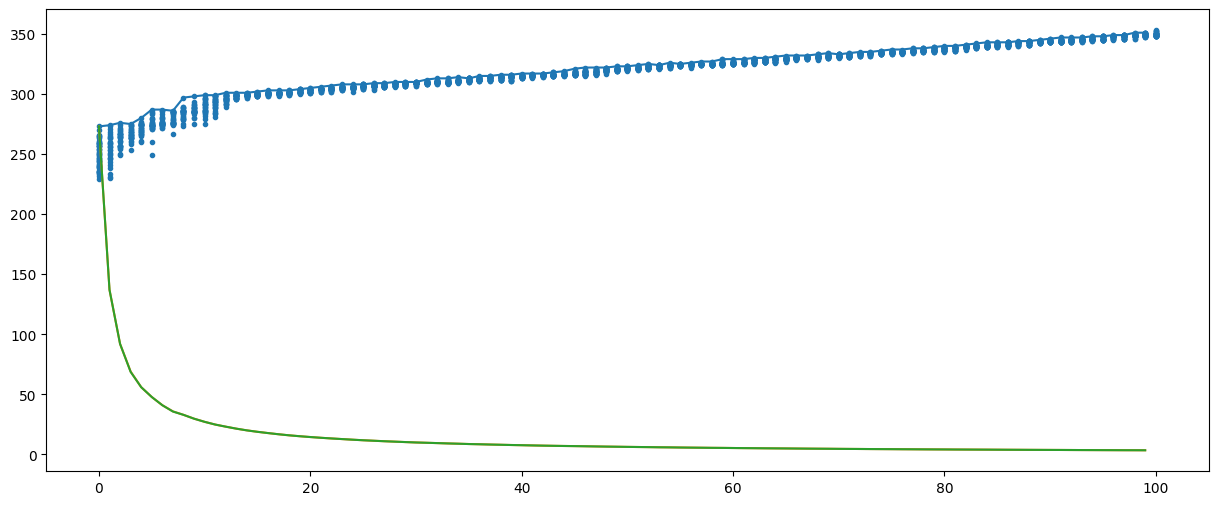

In [7]:
off_line = [max(f[1] for f in fitness_log if f[0] == x) / (x + 1) for x in range(NUM_GENERATIONS)]
on_line = [max(f[1] for f in fitness_log if f[0] <= x) / (x + 1) for x in range(NUM_GENERATIONS)]
gen_best = [max(f[1] for f in fitness_log if f[0] == x) for x in range(NUM_GENERATIONS)]

plt.figure(figsize=(15, 6))
plt.scatter([x for x, _ in fitness_log], [y for _, y in fitness_log], marker=".")
plt.plot([x for x, _ in enumerate(gen_best)], [y for _, y in enumerate(gen_best)])
plt.plot([x for x, _ in enumerate(on_line)], [y for _, y in enumerate(on_line)])
plt.plot([x for x, _ in enumerate(off_line)], [y for _, y in enumerate(off_line)])